# **Large Language Models and Machine Learning for Unstructured Data**

*Interacting with Large Language Models*

<br>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//unstructured-data/BdI_EIEF/blob/main/notebooks/3_llm_api.ipynb)



# 0. Setup

In [96]:
%%capture

# install required libraries
# !pip3 install google-generativeai             # Google's Gemini API (no need to install in Colab)
!pip3 install openai                            # OpenAI API
!pip3 install tiktoken                          # Estimate costs of using OpenAI models
!pip3 install ipywidgets

In [ ]:
# basic libraries
import pandas as pd
import numpy as np
import os
from IPython.core.display import HTML
from tqdm import tqdm
import urllib.request
import re
import tiktoken

# LLMs APIs
import google.generativeai as genai
from openai import OpenAI

# colab secrets

from google.colab import userdata

# 1. Interacting with LLMs through APIs



### What is an API?

Application Programming Interfaces (APIs) allow applications to *speak to each other*. In our context, we will use APIs so that Python can directly speak to multiple language models. This will help us programatically interact with language models and fulfill certain tasks that can't be done manually.

<br>

*How would you summarize 10,000 different news articles using ChatGPT?*

### Requirements for using an API

To interact with an API we just need to use a programming language supported by the API (most of them support Python) and a key that identifies us. In order to get started with an API, it is always a good idea to go to the documentation provided by its creator.

- [Google](https://ai.google.dev/gemini-api)
- [OpenAI](https://platform.openai.com/docs/quickstart?context=python)
- [Anthropic](https://www.anthropic.com/api)


Below, we will provide some boilerplate code to interact with some of the main APIs in the market.

In [ ]:
#@title
HTML("""
<div class="alert">
  <h2> APIs Keys </h2>
  <br>
  <p> Be careful! Never leave your keys in public repositories or in files that are shared. Since some of the API services are paid, this can lead to malicious actors using your key. </p>

</div>

<style>
.alert {
  padding: 20px;
  background-color: #D72638;
  color: white;
  margin-bottom: 15px;
}

h2{
  font-size: 30px;
  color: white;
}

li, p{
  font-size: 20px;
}

</style>
""")

### Some key parameters for text generation with LLMs

- [Temperature](https://lukesalamone.github.io/posts/what-is-temperature/): Controls the "randomness" of the generated text by influencing the underlying token probabilities.
- Max tokens: Helps you pre-define the number of tokens that the model generates.

## Google

In [ ]:
# load the key from file

with open('../../gemini_key.txt', 'r') as file:
    api_key = file.read().replace('\n', '')
    
# or from secret manager

# api_key = userdata.get("gem_key")

In [ ]:
# add your key to the API configuration
genai.configure(api_key=api_key)

In [ ]:
# Set up the model
generation_config = {
"temperature": 0.8,             # Controls the randomness of the output
"max_output_tokens": 150,       # The maximum number of tokens to include
}

In [ ]:
# initialize the model
model = genai.GenerativeModel(model_name='gemini-1.0-pro',            # name of the model we want to use
                              generation_config=generation_config     # parameters
                              )

In [ ]:
# generate a response from a prompt
result = model.generate_content(contents={'role':'user',
                                          'parts': "Write a short song about the housing market in Rome in the style of Maneskin"})

In [ ]:
# extract the text from the response object
print(result.candidates[0].content.parts[0].text)

(Verse 1)
In Rome's ancient heart, where history resides,
A tale unfolds, where housing market abides.
Like a tempestuous sea, it ebbs and it flows,
A labyrinth of deals, where fortunes oppose.

(Chorus)
Oh, Rome, the eternal city,
Your housing market's a reckless ditty.
From opulent palazzos to humble abodes,
The chase for shelter, a relentless road.

(Verse 2)
Tourists and locals alike, they flock to your gate,
Seeking a haven, a place to create.
But as demand soars, so do the prices climb,
A daunting summit, a financial crime.

(


## OpenAI

In [ ]:
# load the key
with open('../../openai_key.txt', 'r') as file:
    api_key = file.read().replace('\n', '')
    
# or from secret manager

# api_key = userdata.get("openai_key")

In [ ]:
# initialize a client using the API key
client = OpenAI(api_key=api_key)

In [ ]:
# get a response from the model
response = client.chat.completions.create(
    model="gpt-3.5-turbo-0125",    # name of the model,
    messages=[
        {"role": "user",
         "content": "Explain the word2vec model with some verses in the style of Giuseppe Verdi."}    # prompt
    ],
    max_tokens=100,                 # max number of tokens to be generate
    temperature=0.1                 # controls the randomness of the output
)

In [ ]:
print(response.choices[0].message.content)

In the realm of language, a model doth reside,
Known as word2vec, a method tried and true,
It doth capture meanings, words side by side,
In vectors, they dance, a linguistic pas de deux.

Like characters in an opera, they sing and soar,
Each word a note, a melody to be heard,
In a symphony of meaning, they explore,
The depths of language, every nuance stirred.

Oh word2vec, thou art a marvel of our


In [ ]:
#@title
HTML("""
<div class="alert">
  <h2> Question </h2>
  <br>
  <ol type="a">
  <li> What other OpenAI model could we have used? </li>
  <li> Where did you find the information? </li>
  </ol>

</div>

<style>
.alert {
  padding: 20px;
  background-color: #586BA4;
  color: white;
  margin-bottom: 15px;
}

h2{
  font-size: 30px;
  color: white;
}

li, p{
  font-size: 20px;
}

</style>
""")

## Anthropic

In [ ]:
!pip3 install anthropic

from anthropic import Anthropic

client = Anthropic(
    api_key="ANTHROPIC_API_KEY",
)

message = client.messages.create(
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": "Hello, Claude",
        }
    ],
    model="claude-3-opus-20240229",
)
print(message.content)

## Cohere

In [ ]:
!pip3 install cohere

import cohere

co = cohere.Client(
    api_key="YOUR_API_KEY",
)

chat = co.chat(
    message="hello world!",
    model="command"
)

print(chat)

## Mistral AI

In [ ]:
!pip3 install mistralai

from mistralai.client import MistralClient

client = MistralClient(api_key="YOUR_KEY")

response = client.completion(
    model="codestral-latest",
    prompt="Hi",
)

response.choices[0].message.content

# 2. Demonstrating different tasks with LLMs

In order to get ourselves familiarized with how to effectively work with the API of modern LLMs, we will demonstrate two different tasks through the notebook.

- **Task 1: Structuring unstructured data.** We will use a corpus of news articles from Colombia to extract from them some of the main actors involved in the events described.
- **Task 2: Latent concept detection.** We will categorize sentences from press conferences after the Federal Open Market Committee (FOMC) as hawkish, neutral or dovish. We will compare the results obtained with an LLM with the labels provided by the authors of [The Voice of Monetary Policy](https://www.aeaweb.org/articles?id=10.1257/aer.20220129) and with a dictionary-based approach.

### Creating an effective prompt

There are many resources available online to get you started on how to build good prompts. I recommend you to search directly within the documentation of the builder of the LLM you want to use for the best advice on how to create prompts for that specific model. Here are some examples:

- OpenAI:
    - [Guide 1](https://help.openai.com/en/articles/6654000-best-practices-for-prompt-engineering-with-the-openai-api)
    - [Guide 2](https://platform.openai.com/docs/guides/prompt-engineering)
    - [Cookbook](https://cookbook.openai.com/)
- Anthropic
    - [Guide](https://docs.anthropic.com/en/docs/prompt-engineering)
    - [Cookbook](https://github.com/anthropics/anthropic-cookbook/)

- Google
    - [Guide](https://ai.google.dev/gemini-api/docs/prompting-intro)


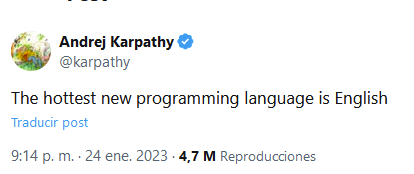

### Some principles for creating effective prompts

1. Be clear and detailed
2. Explicitly ask for an output format
3. Give the model a "role"/"persona"

## Task 1: Structuring unstructured data

Can we extract the most relevant characters discussed in a news article using an LLM?

In [ ]:
# load the data with utf-8 encoding

with open('../../example_text.txt', 'r', encoding="utf-8") as file:
    ny_article = file.read()

In [ ]:
# print part of text

print(ny_article[:1000])

Electing Donald J. Trump once could be dismissed as a fluke, an aberration, a terrible mistake—a consequential one, to be sure, yet still fundamentally an error. But America has now twice elected him as its President. It is a disastrous revelation about what the United States really is, as opposed to the country that so many hoped that it could be. His victory was a worst-case scenario—that a convicted felon, a chronic liar who mismanaged a deadly once-in-a-century pandemic, who tried to overturn the last election and unleashed a violent mob on the nation’s Capitol, who calls America “a garbage can for the world,” and who threatens retribution against his political enemies could win—and yet, in the early morning hours of Wednesday, it happened.

Trump’s defeat of Kamala Harris was no upset, nor was it as unimaginable as when he beat Hillary Clinton, in 2016. But it was no less shocking. For much of the country, Trump’s past offenses were simply disqualifying. Just a week ago, Harris ga

In [ ]:
# PRINCIPLE 1: Be clear and detailed (BAD PROMPT)
my_prompt = f"""
who does this article talk about?:

{ny_article}
"""

print(my_prompt[:1000])


who does this article talk about?:

Electing Donald J. Trump once could be dismissed as a fluke, an aberration, a terrible mistake—a consequential one, to be sure, yet still fundamentally an error. But America has now twice elected him as its President. It is a disastrous revelation about what the United States really is, as opposed to the country that so many hoped that it could be. His victory was a worst-case scenario—that a convicted felon, a chronic liar who mismanaged a deadly once-in-a-century pandemic, who tried to overturn the last election and unleashed a violent mob on the nation’s Capitol, who calls America “a garbage can for the world,” and who threatens retribution against his political enemies could win—and yet, in the early morning hours of Wednesday, it happened.

Trump’s defeat of Kamala Harris was no upset, nor was it as unimaginable as when he beat Hillary Clinton, in 2016. But it was no less shocking. For much of the country, Trump’s past offenses were simply disq

In [ ]:
# re-start the client
client = OpenAI(api_key=api_key)

In [ ]:
# get a response from the model
response = client.chat.completions.create(
    model="gpt-3.5-turbo-0125",    # name of the model,
    messages=[
        {"role": "user",
         "content": my_prompt},
    ],
    max_tokens=100,                 # max number of tokens to generate
    temperature=0.0
)

In [ ]:
# extract response
print(response.choices[0].message.content)

This article talks about the re-election of Donald J. Trump as President of the United States, the defeat of Kamala Harris in the election, the potential consequences of Trump's return to power, and the implications for the country and the world. It discusses Trump's controversial policies and rhetoric, as well as the challenges and dangers that may arise from his second term in office. The article also touches on the failures of the Democratic Party and the potential impact of Trump's presidency on various aspects of American society


In [ ]:
# PRINCIPLE 1: Be clear and detailed (GOOD PROMPT)
my_prompt = f"""
We want to extract the relevant people from a news article.

Please follow these steps:
1. Identify all the people mentioned and any description of them
2. Identify any political offices mentioned

Here is the text of the article:
{ny_article}

"""

In [ ]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo-0125",    # name of the model,
    messages=[
        {"role": "user", "content": my_prompt},
    ],
    max_tokens=1000,                 # max number of tokens to be generate
    temperature=0.0                 # temperature
)

In [ ]:
print(response.choices[0].message.content)

People mentioned in the article:
1. Donald J. Trump
2. Kamala Harris
3. Barack Obama
4. Joe Biden
5. Hillary Clinton
6. Grover Cleveland
7. George H. W. Bush
8. Martin Van Buren
9. Josh Shapiro
10. Tim Walz
11. Doug Sosnik
12. Mike Pence
13. John Kelly
14. Howard Lutnick
15. Jared Kushner
16. Mark Milley
17. Christopher Wray
18. Jay Powell
19. Elon Musk
20. Vladimir Putin

Political offices mentioned:
1. President
2. Vice-President
3. White House political director
4. Governor
5. F.B.I. director
6. Chairman of the Federal Reserve
7. Chairman of the Joint Chiefs of Staff
8. Secretary of Cost Cutting


In [ ]:
# PRINCIPLE 2: Explicitly ask for an output format

my_prompt = f"""
We want to extract the relevant characters from a news article. Provide your output in json format with each step as a key.

Please follow these steps:
1. People: Identify all the people mentioned and any description of them
2. Institutions: Identify all the institutions mentioned

Here is the text of the article:
{ny_article}

"""

In [ ]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo-0125",    # name of the model,
    messages=[
        {"role": "user", "content": my_prompt},
    ],
    max_tokens=1000,                 # max number of tokens to be generate
    temperature=0.0                 # temperature
)

In [ ]:
print(response.choices[0].message.content)

{
    "People": {
        "Donald J. Trump": "Twice-elected President, convicted felon, chronic liar, mismanaged pandemic, tried to overturn election, unleashed violent mob, calls America 'a garbage can for the world', threatens retribution against political enemies",
        "Kamala Harris": "Defeated by Trump, gave closing argument against Trump, emphasized unity and American values",
        "Barack Obama": "Outgoing President at the dawn of the Age of Trump, warned about the consequences of two terms of Trump",
        "Joe Biden": "Defeated Trump, criticized for contributing to Trump's return by running for re-election despite aging",
        "Josh Shapiro": "Popular governor of Pennsylvania",
        "Tim Walz": "Governor of Minnesota, chosen as Harris's Vice-Presidential running mate",
        "George H. W. Bush": "Only sitting Vice-President elected to the Presidency since Martin Van Buren",
        "Jared Kushner": "Son-in-law of Trump, concluded that poor personnel decisions 

In [97]:
# load the data with utf-8 encoding

with open('../../example_text2.txt', 'r', encoding="utf-8") as file:
    tt_article = file.read()

In [98]:
# PRINCIPLE 3: Give the model a role/persona
my_prompt = f"""Summarize the article below.
Article:
{tt_article}
"""

We will give the model its role/person through a **system prompt**. Anthropic provides a nice [guide](https://docs.anthropic.com/en/docs/system-prompts) explaining what system prompts are and how to use them.

In [101]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo-0125",    # name of the model,,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that replies with a concise one-sentence answer that always starts with the letter T."},  # define the ROLE/PERSONA
        {"role": "user", "content": my_prompt},
    ],
    max_tokens=100,                 # max number of tokens to be generate
    temperature=0.0                 # temperature
)

In [102]:
print(response.choices[0].message.content)

Texas is targeting the Tren de Aragua gang by declaring it a foreign terrorist organization and mobilizing law enforcement to pursue its criminal activities.


In [103]:
# Under-the-hood the "system prompt" is partially how the models have certain guardrails

response = client.chat.completions.create(
    model="gpt-3.5-turbo-0125",    # name of the model,
    messages=[
        {"role": "system", "content": """You are a language model that works with young children. Never produce content related to violence or gangs."
        If asked to produce this content please reply with the phrase "I can't do that :( \nViolence is not good  " """
        },
        {"role": "user", "content": my_prompt},
    ],
    max_tokens=100,                 # max number of tokens to be generate
    temperature=0.0                 # temperature
)

In [104]:
print(response.choices[0].message.content)

I can't do that :( 
Violence is not good


## Task 2: Latent Concept Detection

To demonstrate this task we will use data from [The Voice of Monetary Policy (Gorodnichenko  et. al 2023)](https://www.aeaweb.org/articles?id=10.1257/aer.20220129) paper that contains labeled sentences from press conferences after FOMC meetings. Sentences were labeled as hawisk, neutral or dovish.

In [105]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo-0125",    # name of the model,
    messages=[
        {"role": "system", "content": """You are an expert financial analyst with great capacity to explain complex concepts to a broad audicence."""},
        {"role": "user", "content": "Explain the meaning of hawkish and dovish"},
    ],
    max_tokens=200,                 # max number of tokens to be generate
    temperature=0.0                 # temperature
)

In [106]:
print(response.choices[0].message.content)

Certainly! In the context of financial markets and central banking, "hawkish" and "dovish" are terms used to describe the stance of policymakers towards monetary policy.

1. **Hawkish**: A hawkish stance refers to a more aggressive or restrictive monetary policy approach. When central bankers are described as being hawkish, it means they are more concerned about controlling inflation and may be inclined to raise interest rates to curb inflationary pressures. Hawkish policymakers are generally more focused on price stability and are willing to prioritize controlling inflation over other economic objectives like maximizing employment.

2. **Dovish**: On the other hand, a dovish stance refers to a more accommodative or expansionary monetary policy approach. Dovish policymakers are more concerned about stimulating economic growth and reducing unemployment, even if it means accepting slightly higher inflation. They are more likely to lower interest rates or implement other stimulus measures

In [107]:
file_id = "1INq3wr9DuykD4iSlUCocHegOJ5qgLP8z"
df = pd.read_csv(f"https://drive.google.com/uc?export=download&id={file_id}&authuser=0&export=download", sep="\t")
df.head()

,ID,text,sentiment
0,157_1,The action was taken to cushion the effects on...,dovish
1,161_2,Such trends could foster inflationary imbalanc...,hawkish
2,52_0,The Federal Open Market Committee at its meeti...,neutral
3,21_5,Although continuing favorable trends bolster l...,dovish
4,78_7,The Committee perceives that the upside and do...,neutral


In [109]:
# explore a sentence and its label
i = np.random.randint(0, len(df))
print("Label: ", df.loc[i, "sentiment"], "\n\n")
print(df.loc[i, "text"])

Label:  dovish 


The Federal Open Market Committee decided today to lower its target for the federal funds rate by 50 basis points to 6 percent


In [110]:
# first attempt at a prompt
def generation_prompt(text):
    prompt = f"""
    Classify the following text as hawkish, dovish, or neutral.

    Text: {text}
    """
    return prompt

In [111]:
i = 1184
print("Label: ", df.loc[i, "sentiment"])
text = df.loc[i, "text"]
my_prompt = generation_prompt(text)
print(my_prompt)

Label:  dovish

    Classify the following text as hawkish, dovish, or neutral.

    Text: In a related action, the Board of Governors approved a 25 basis point reduction in the discount rate to 3 percent
    


In [ ]:
# re-start the client
client = OpenAI(api_key=api_key)

In [112]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo-0125",    # name of the model
    messages=[
        {"role": "user", "content": my_prompt},
    ],
    max_tokens=10,                  # max number of tokens to be generate
    temperature=0.0                 # temperature
)

In [113]:
print(response.choices[0].message.content)

Hawkish


In [ ]:
#@title
HTML("""
<div class="alert">
  <h2> Exercise </h2>
  <br>
  <p> 1. Improving the prompt </p>
  <br>
  <ol type="a">
  <li> Expand the current prompt in a way that helps generate better results.</li>
  <li> What principles or ideas did you use? </li>
  <li> Try your new prompt. Any improvements? </li>
  </ol>
  <br>

</div>

<style>
.alert {
  padding: 20px;
  background-color: #586BA4;
  color: white;
  margin-bottom: 15px;
}

h2{
  font-size: 30px;
  color: white;
}

li, p{
  font-size: 20px;
}

</style>
""")

In [ ]:
# Modify the function
def generation_prompt(text):
    prompt = f"""



    YOUR WONDERFUL NEW PROMPT





    {text}
    """
    return prompt

In [ ]:
# generate text from the model

In [ ]:
# print response

In [ ]:
#@title
HTML("""
<div class="alert">
  <h2> DON'T GO BEYOND THIS POINT ON YOUR OWN </h2>




</div>

<style>
.alert {
  padding: 20px;
  background-color: #F49D37;
  color: white;
  margin-bottom: 20px;
}

h2{
  font-size: 50px;
  color: white;
}

li, p{
  font-size: 20px;
}

</style>
""")

In [114]:
# Source of inspiration for the prompt:
# https://www.newyorkfed.org/medialibrary/media/research/conference/2023/FinTech/400pm_Hansen_Paper_Kazinnik_2023.pdf?sc_lang=en&hash=9B1647BD6876D0F3959C6919BA3F82DE

def generation_prompt(text):
    prompt = f"""
    Your task is to classify the text into one of the three categories ("dovish", "neutral", "hawkish").
    The text is taken at random from the texts of FOMC announcements.
    Provide your output in json format with a key "category" and the selected category.

    Text:
    {text}
    """
    return prompt

In [115]:
#i = np.random.randint(0, len(df))
i = 1184
text = df.loc[i, "text"]
sentiment = df.loc[i, "sentiment"]
my_prompt = generation_prompt(text)
print("Human label for sentiment: ", sentiment)
print(my_prompt)

Human label for sentiment:  dovish

    Your task is to classify the text into one of the three categories ("dovish", "neutral", "hawkish").
    The text is taken at random from the texts of FOMC announcements.
    Provide your output in json format with a key "category" and the selected category.

    Text:
    In a related action, the Board of Governors approved a 25 basis point reduction in the discount rate to 3 percent
    


In [116]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo-0125",    # name of the model
    messages=[
        {"role": "system", "content": "You are a research assistant working for the Fed. You have a degree in Economics."},
        {"role": "user", "content": my_prompt},
    ],
    max_tokens=15,                 # max number of tokens to be generate
    temperature=0                  # temperature
)

In [117]:
print(response.choices[0].message.content)

{
    "category": "dovish"
}


### Estimating the cost

In [118]:
# To get the tokeniser corresponding to a specific model in the OpenAI API:
cost_per_million_input = 0.5
cost_per_million_output = 1.5

enc = tiktoken.encoding_for_model("gpt-3.5-turbo-0125")

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.encoding_for_model(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

def calculate_cost(input_tokens, output_tokens, input_cost, output_cost):
    return (input_tokens/1000000)*input_cost + (output_tokens/1000000)*output_cost


prompt = """You are a research assistant working for the Fed. You have a degree in Economics.
Your task is to classify the text into one of the three categories ("dovish", "neutral", "hawkish").
The text is taken at random from the texts of FOMC announcements.
Provide your output in json format with a key "category" and the selected category.
"""

In [119]:
all_costs = []
for text in df["text"].values:
    all_text = prompt + text
    num_tokens_input = num_tokens_from_string(all_text, "gpt-3.5-turbo")
    num_tokens_output = 15
    cost = calculate_cost(num_tokens_input, num_tokens_output,
                          cost_per_million_input, cost_per_million_output)
    all_costs.append(cost)

In [120]:
df["cost"] = all_costs
df

,ID,text,sentiment,cost
0,157_1,The action was taken to cushion the effects on...,dovish,0.000074
1,161_2,Such trends could foster inflationary imbalanc...,hawkish,0.000068
2,52_0,The Federal Open Market Committee at its meeti...,neutral,0.000077
3,21_5,Although continuing favorable trends bolster l...,dovish,0.000089
4,78_7,The Committee perceives that the upside and do...,neutral,0.000072
...,...,...,...,...
1238,142_13,To promote a smooth transition in markets as t...,neutral,0.000081
1239,145_13,In light of ongoing improvements in the functi...,neutral,0.000090
1240,87_8,With underlying inflation still expected to be...,neutral,0.000073
1241,37_0,The Federal Open Market Committee decided toda...,neutral,0.000130


In [121]:
print(f"Total cost of processing the data: {np.round(df['cost'].sum(), 3)} USD")

Total cost of processing the data: 0.1 USD


### Running the model on many texts

Some resources on how to run many prompts:

- [Batch processing](https://cookbook.openai.com/examples/batch_processing)
- [Rate limits](https://platform.openai.com/docs/guides/rate-limits/error-mitigation)

In [122]:
def classify_response(result):
    if "hawkish" in result:
        return "hawkish"
    elif "dovish" in result:
        return "dovish"
    elif "neutral" in result:
        return "neutral"
    else:
        return np.nan

In [ ]:
# # DON'T RUN!
# all_responses = []
# for text in tqdm(df["text"]):
#     my_prompt = generation_prompt(text)
#     response = client.chat.completions.create(
#         model="gpt-3.5-turbo-0125",    # name of the model,
#         messages=[
#             {"role": "system", "content": "You are a research assistant working for the Fed. You have a degree in Economics."},
#             {"role": "user", "content": my_prompt},
#         ],
#         max_tokens=15,               # max number of tokens to be generate
#         temperature=0                # temperature
#     )
#     result = response.choices[0].message.content
#     all_responses.append(classify_response(result))

# # append data to existing dataframe
# df["gpt_response"] = all_responses
# df

100%|██████████| 1243/1243 [10:45<00:00,  1.93it/s]


In [123]:
# read data after doing GPT classification
file_id = "1v6U80WISF4TxXTLPBvTpiV8iWlIgNsHG"
df = pd.read_csv(f"https://drive.google.com/uc?export=download&id={file_id}&authuser=0&export=download", sep=",")
df.head()

,ID,text,sentiment,cost,gpt_response
0,157_1,The action was taken to cushion the effects on...,dovish,0.000052,dovish
1,161_2,Such trends could foster inflationary imbalanc...,hawkish,0.000045,hawkish
2,52_0,The Federal Open Market Committee at its meeti...,neutral,0.000055,hawkish
3,21_5,Although continuing favorable trends bolster l...,dovish,0.000067,dovish
4,78_7,The Committee perceives that the upside and do...,neutral,0.000049,neutral


In [124]:
# calculate accuracy
df["gpt_correct"] = df["sentiment"] == df["gpt_response"]
gpt_accuracy = df["gpt_correct"].mean()
print(f"Random guessing accuracy: {1/3}")
print(f"Accuracy of GPT: {gpt_accuracy}")

Random guessing accuracy: 0.3333333333333333
Accuracy of GPT: 0.6822204344328238


### Compare performance to a dictionary

The objective of this notebook is not to demonstrate how to apply dictionary methods. However, if you want in-depth examples, these two notebooks below provide a good starting point:

1. [Dicitonary methods through regular expressions](https://github.com/sekhansen/text_algorithms_econ/blob/main/notebooks/1_regex_dictionary.ipynb)
2. [Text preprocessing and dictionary methods](https://github.com/sekhansen/text_algorithms_econ/blob/main/notebooks/2_preprocessing.ipynb)

In [125]:
hawkish_terms = ["tight*", "hike*", "increas*", "hawkish", "taper", "liftoff"]
dovish_terms = ["ease*", "easing*", "cut*", "dovish", "reduc*", "decrea*"]

In [126]:
# Convert terms with * to regular expressions
def convert_to_regex(terms):
    regex_terms = []
    for term in terms:
        if term.endswith('*'):
            regex_terms.append(r'\b' + re.escape(term[:-1]))
        else:
            regex_terms.append(r'\b' + re.escape(term) + r'\b')
    return regex_terms

hawkish_regex = convert_to_regex(hawkish_terms)
dovish_regex = convert_to_regex(dovish_terms)

In [ ]:
hawkish_regex

['\\btight',
 '\\bhike',
 '\\bincreas',
 '\\bhawkish\\b',
 '\\btaper\\b',
 '\\bliftoff\\b']

In [127]:
negation_words = ["less", "no", "not", "little", "don’t", "doesn’t", "hasn’t", "haven’t", "won’t", "shouldn’t", "didn’t"]

def is_negated(term_index, words):
    if term_index == 0:
        return False
    return words[term_index - 1].lower() in negation_words

In [128]:
def count_terms(sentence):
    words = sentence.split()
    hawkish_count = 0
    dovish_count = 0

    for i, word in enumerate(words):
        clean_word = re.sub(r'\W+', '', word.lower())  # Remove punctuation and lowercase
        hawkish_found = any(re.search(hawkish_term, clean_word) for hawkish_term in hawkish_regex)
        dovish_found = any(re.search(dovish_term, clean_word) for dovish_term in dovish_regex)

        if hawkish_found:
            if is_negated(i, words):
                dovish_count += 1
            else:
                hawkish_count += 1
        elif dovish_found:
            if is_negated(i, words):
                hawkish_count += 1
            else:
                dovish_count += 1

    return hawkish_count, dovish_count


def classify_sentence(hawkish_count, dovish_count):
    if hawkish_count > dovish_count:
        return "hawkish"
    elif dovish_count > hawkish_count:
        return "dovish"
    else:
        return "neutral"

In [129]:
# Classify each sentence
dict_classification = []
for sentence in df["text"]:
    hawk, dove = count_terms(sentence)
    classification = classify_sentence(hawk, dove)
    dict_classification.append(classification)

In [130]:
# add results to dataframe
df["dict"] = dict_classification
df.head()

,ID,text,sentiment,cost,gpt_response,gpt_correct,dict
0,157_1,The action was taken to cushion the effects on...,dovish,0.000052,dovish,True,hawkish
1,161_2,Such trends could foster inflationary imbalanc...,hawkish,0.000045,hawkish,True,neutral
2,52_0,The Federal Open Market Committee at its meeti...,neutral,0.000055,hawkish,False,neutral
3,21_5,Although continuing favorable trends bolster l...,dovish,0.000067,dovish,True,neutral
4,78_7,The Committee perceives that the upside and do...,neutral,0.000049,neutral,True,neutral


In [131]:
df["dict_correct"] = df["dict"] == df["sentiment"]
dict_accuracy = df["dict_correct"].mean()
print(f"Random guessing accuracy: {1/3}")
print(f"Accuracy of GPT: {gpt_accuracy}")
print(f"Accuracy of Dictionary: {dict_accuracy}")

Random guessing accuracy: 0.3333333333333333
Accuracy of GPT: 0.6822204344328238
Accuracy of Dictionary: 0.46178600160901045


# 3. Getting embeddings from the API

[OpenAI Embeddings Guide](https://platform.openai.com/docs/guides/embeddings)

In [ ]:
# initialize a client using the API key
client = OpenAI(api_key=api_key)

In [132]:
text = "This is a small test to get some embeddings."
result = client.embeddings.create(input = [text],
                                  model="text-embedding-3-small")

In [133]:
embeddings = result.data[0].embedding
len(embeddings)

1536